# Determining most Profitable Tariff for a Telecom Company

## Project Description

We are tasked with analyzing two cellular tariff plans, "Smart" and "Ultra," for the "Megaline" operator. Our goal is to determine which plan generates more revenue to optimize the advertising budget. We have a dataset of 500 customers, including their plan, usage data (calls, messages, internet), and location. The analysis involves:

Exploring and understanding the datasets.

Data preparation, including data type conversion and error correction.

Data analysis and visualization.

Hypothesis testing for:

a. Difference in average revenue between "Ultra" and "Smart" users.

b. Difference in average revenue between Moscow and other regions.


The outcome will provide insights into the more profitable tariff plan.






##  Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
calls=pd.read_csv('/datasets/calls.csv')

In [4]:
internet=pd.read_csv('/datasets/internet.csv')

In [5]:
messages=pd.read_csv('/datasets/messages.csv')

In [6]:
tariffs=pd.read_csv('/datasets/tariffs.csv')

In [7]:
users=pd.read_csv('/datasets/users.csv')

In [8]:
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [9]:
display(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

The "calls" table contains information about the duration of calls in minutes for each user, including the user's identifier, call date, number of minutes, and a unique call number.

In [10]:
display(internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [11]:
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

The "Internet" table contains information about the amount of internet traffic used by each user, including the user's identifier, internet session date, volume of data consumed in megabytes per session, and a unique session number.

In [12]:
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
display(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

The "messages" table contains information about the number of messages sent by each user, including the message date, user identifier, and a unique message number.

In [14]:
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
display(tariffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

From the information provided, we can see that there are two tariffs: "Smart" and "Ultra," which differ in terms of price, the number of messages, internet traffic volume, and the number of minutes per month. The "Ultra" tariff is more expensive but offers more minutes, data traffic, and messages.

In [16]:
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [17]:
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

The "users" table contains information about users, including their first name and last name, unique identifier, the name of the tariff plan, date of tariff activation, date of tariff discontinuation (if omitted, it means the tariff was active at the time of data extraction), age, and city of residence.

## Data Preparation

#### The number of calls and used minutes of conversation per month

We will change the data type in the "call_date" column in the "calls" table.

In [18]:
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y.%m.%d')

We will add a column with the name of the month in order to calculate the number of minutes per month.

In [19]:
calls['month']=pd.DatetimeIndex(calls['call_date']).month

We will do the same with the "session_date" column in the "Internet" table and the "message_date" column in the "messages" table, respectively.

In [20]:
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y.%m.%d')

In [21]:
messages['month']=pd.DatetimeIndex(messages['message_date']).month

In [22]:
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y.%m.%d')

In [23]:
internet['month']=pd.DatetimeIndex(internet['session_date']).month

As per the given information, "Megaline" always rounds seconds up to minutes and megabytes up to gigabytes. Each call is rounded individually: even if it lasted only 1 second, it will be counted as 1 minute.

Therefore, before calculating monthly call statistics for each subscriber, let's round the call durations up to minutes.

Since the round() method rounds down, and we need to round up, we will use the ceil() method from the Numpy library.

In [24]:
import numpy as np

In [25]:
calls['duration']=np.ceil(calls['duration'])

We will group the table by each user and month. We will use the groupby method instead of pivot_table to ensure that these tables can be merged into one in the future based on the user_id column.

In [26]:
calls_duration_by_user= calls.groupby(['user_id','month'])['duration'].sum().reset_index()

In [27]:
display(calls_duration_by_user)

,user_id,month,duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
...,...,...,...
3169,1498,10,247.0
3170,1499,9,70.0
3171,1499,10,449.0
3172,1499,11,612.0


We will calculate the number of calls per month for each subscriber.

In [28]:
calls_count_by_user= calls.groupby(['user_id','month']).agg(['count', 'sum']).reset_index()

In [29]:
display(calls_count_by_user)

user_id month    id                                                     \
                   count                                                sum   
0       1000     5    22  1000_111000_381000_561000_781000_1131000_12410...   
1       1000     6    43  1000_21000_181000_391000_441000_461000_511000_...   
2       1000     7    47  1000_01000_121000_151000_251000_291000_421000_...   
3       1000     8    52  1000_11000_71000_91000_101000_161000_171000_23...   
4       1000     9    58  1000_31000_81000_131000_211000_241000_351000_4...   
...      ...   ...   ...                                                ...   
3169    1498    10    41  1498_01498_11498_51498_101498_121498_181498_25...   
3170    1499     9     9  1499_521499_881499_1261499_1401499_1421499_147...   
3171    1499    10    68  1499_11499_91499_121499_131499_221499_271499_3...   
3172    1499    11    74  1499_21499_31499_41499_61499_81499_101499_1514...   
3173    1499    12    69  1499_01499_51499_71499_111499_141499_161499_18...   

     duration         
        count    sum  
0          22  159.0  
1          43  172.0  
2          47  340.0  
3          52  408.0  
4          58  466.0  
...       ...    ...  
3169       41  247.0  
3170        9   70.0  
3171       68  449.0  
3172       74  612.0  
3173       69  492.0  

[3174 rows x 6 columns]

#### We will calculate the number of sent messages per month.

In the same way, we will calculate the number of sent messages per month for each user.

In [30]:
messages_by_user=messages.groupby(['user_id', 'month'])['id'].count().reset_index()

In [31]:
display(messages_by_user)

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


#### We will calculate the volume of used internet traffic per month.


Let's calculate the total number of megabytes used per month for each user in the same manner.

In [32]:
internet_by_user=internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()

We will convert megabytes to gigabytes since the customer is charged for gigabytes.

In [33]:
internet_by_user['mb_used']=internet_by_user['mb_used']/1024

In [34]:
internet_by_user=internet_by_user.rename(columns={'mb_used':'Gb_used'})

According to the provided information, the total monthly traffic amount is rounded up. Let's round the traffic for each user per month accordingly.

In [35]:
internet_by_user['Gb_used']=np.ceil(internet_by_user['Gb_used'])

In [36]:
display(internet_by_user)

,user_id,month,Gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


In [37]:
display(internet_by_user)

,user_id,month,Gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


#### The revenue from each user per month.

We will calculate revenue using the formula: Total sum of call durations, messages, and internet traffic per month minus the free limit; then multiply the remainder by the tariff plan's rates and add the subscription fee. To do this, we will gradually merge the tables.

In [38]:
calls_messages=calls_duration_by_user.merge(messages_by_user, on=['user_id', 'month'], how='outer')

In [39]:
calls_messages.rename(columns={'duration':'call_duration', 'id':'messages'}, inplace=True)

In [40]:
calls_messages_internet=calls_messages.merge(internet_by_user, on =['user_id', 'month'], how='outer')

In [41]:
calls_messages_internet_users =calls_messages_internet.merge(users, on ='user_id', how='outer')

In [42]:
calls_messages_internet_users=calls_messages_internet_users.drop(columns=['age', 'churn_date', 'first_name', 'last_name', 'reg_date'])

In [43]:
tariffs=tariffs.rename(columns={'tariff_name':'tariff'})

In [44]:
tariffs['mb_per_month_included']=tariffs['mb_per_month_included']/1024

In [45]:
tariffs.rename(columns={'mb_per_month_included':'Gb_per_month_included'})

,messages_included,Gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [46]:
calls_messages_internet_users=calls_messages_internet_users.merge(tariffs, on='tariff', how='right' )

Let's add columns to calculate the difference between the used minutes, messages, gigabytes, and the included amounts in the tariff.

In [47]:
calls_messages_internet_users['minutes_surplus']=calls_messages_internet_users['call_duration']-calls_messages_internet_users['minutes_included']

In [48]:
calls_messages_internet_users['Gb_surplus']=calls_messages_internet_users['Gb_used']-calls_messages_internet_users['mb_per_month_included']

In [49]:
calls_messages_internet_users['messages_surplus']=calls_messages_internet_users['messages']-calls_messages_internet_users['messages_included']

Let's add columns indicating the extra minutes, megabytes, and messages for which an additional fee will be charged.

In [50]:
def replace_negative(elem):
    if elem>0:
       return elem
    else:
        return 0
calls_messages_internet_users['minutes_charged']=calls_messages_internet_users['minutes_surplus'].apply(replace_negative)

In [51]:
calls_messages_internet_users['Gb_charged']=calls_messages_internet_users['Gb_surplus'].apply(replace_negative)

In [52]:
calls_messages_internet_users['messages_charged']=calls_messages_internet_users['messages_surplus'].apply(replace_negative)

Let's add a column to calculate the revenue.



<div class="alert alert-infОкруглила Гбт. до целых в пункте 2.2.3 
</div>



In [53]:
calls_messages_internet_users['revenue'] = calls_messages_internet_users['minutes_charged'] * calls_messages_internet_users['rub_per_minute']+calls_messages_internet_users['Gb_charged'] * calls_messages_internet_users['rub_per_gb']+calls_messages_internet_users['messages_charged'] * calls_messages_internet_users['rub_per_message']

In [54]:
display(calls_messages_internet_users)

,user_id,month,call_duration,messages,Gb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,...,rub_per_gb,rub_per_message,rub_per_minute,minutes_surplus,Gb_surplus,messages_surplus,minutes_charged,Gb_charged,messages_charged,revenue
0,1001,11.0,430.0,NaN,18.0,Москва,smart,50,15.0,500,...,200,3,3,-70.0,3.0,NaN,0.0,3.0,0.0,600.0
1,1001,12.0,414.0,NaN,14.0,Москва,smart,50,15.0,500,...,200,3,3,-86.0,-1.0,NaN,0.0,0.0,0.0,0.0
2,1002,6.0,117.0,4.0,11.0,Стерлитамак,smart,50,15.0,500,...,200,3,3,-383.0,-4.0,-46.0,0.0,0.0,0.0,0.0
3,1002,7.0,214.0,11.0,18.0,Стерлитамак,smart,50,15.0,500,...,200,3,3,-286.0,3.0,-39.0,0.0,3.0,0.0,600.0
4,1002,8.0,289.0,13.0,20.0,Стерлитамак,smart,50,15.0,500,...,200,3,3,-211.0,5.0,-37.0,0.0,5.0,0.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1473,9.0,NaN,19.0,17.0,Красноярск,ultra,1000,30.0,3000,...,150,1,1,NaN,-13.0,-981.0,0.0,0.0,0.0,0.0
3212,1473,10.0,NaN,20.0,14.0,Красноярск,ultra,1000,30.0,3000,...,150,1,1,NaN,-16.0,-980.0,0.0,0.0,0.0,0.0
3213,1473,11.0,NaN,14.0,22.0,Красноярск,ultra,1000,30.0,3000,...,150,1,1,NaN,-8.0,-986.0,0.0,0.0,0.0,0.0
3214,1473,12.0,NaN,20.0,18.0,Красноярск,ultra,1000,30.0,3000,...,150,1,1,NaN,-12.0,-980.0,0.0,0.0,0.0,0.0


In [55]:
revenue_monthly=calls_messages_internet_users.pivot_table(index='month', columns='tariff', values=['revenue'], aggfunc='sum')

<AxesSubplot:xlabel='month'>

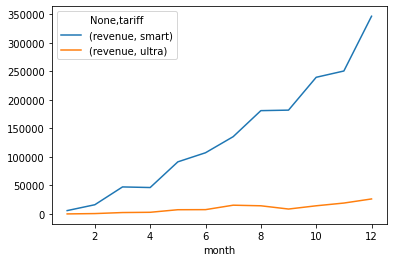

In [56]:
revenue_monthly.plot()

It can be concluded that the revenue from users on the "Smart" tariff is higher than the revenue from users on the "Ultra" tariff.

## Data Analysis

#### How many minutes of conversation users spend each month on the "Smart" and "Ultra" tariffs in total.

In [57]:
calls_monthly=calls_messages_internet_users.pivot_table(index='month', columns='tariff', values=['call_duration'], aggfunc='sum')

In [58]:
display(calls_monthly)

call_duration         
tariff         smart    ultra
month                        
1.0           6931.0   3853.0
2.0          17324.0   7131.0
3.0          30034.0  18117.0
4.0          41119.0  25191.0
5.0          54618.0  34192.0
6.0          64885.0  40295.0
7.0          82079.0  49667.0
8.0          99045.0  54653.0
9.0         111439.0  62036.0
10.0        125284.0  68644.0
11.0        137544.0  72545.0
12.0        161275.0  82400.0

<AxesSubplot:xlabel='month'>

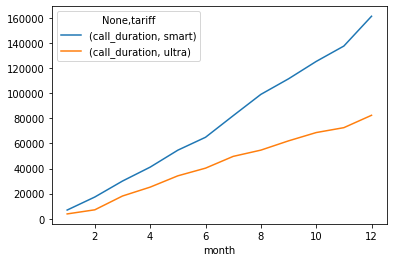

In [59]:
calls_monthly.plot()

It's interesting to observe that users on the "Ultra" tariff are spending fewer minutes on calls per month compared to users on the "Smart" tariff. Additionally, the number of calls per month appears to be increasing. This trend could potentially be due to users gradually joining over the years.

Let's analyze the calls made by users throughout the entire year on the "Ultra" tariff.

In [60]:
calls_duration_by_user=calls_duration_by_user.merge(users, on='user_id', how='outer')

In [61]:
calls_duration_by_user_ultra=calls_duration_by_user.query('tariff=="ultra"')

In [62]:
calls_duration_by_user_smart=calls_duration_by_user.query('tariff=="smart"')

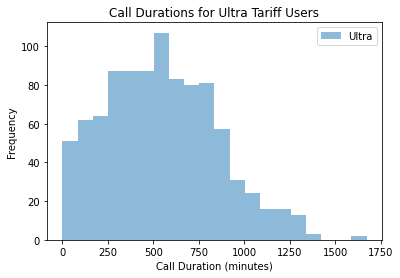

In [136]:
plt.hist(calls_duration_by_user_ultra['duration'], bins=20, alpha=0.5, label='Ultra')
plt.xlabel('Call Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Call Durations for Ultra Tariff Users')
plt.legend()

# Show the plot
plt.show()



Thank you for the additional information. It seems like you've successfully interpreted the histogram. The left-skewed distribution indicates that most users on the "Ultra" tariff talk for around 500 to 700 minutes per month. This observation aligns well with your analysis. If you have further questions or analysis you'd like to perform, feel free to share, and I'll be here to assist.

Let's calculate the average call duration.

In [65]:
calls_duration_by_user_ultra['duration'].mean()

545.4511041009464

Let's calculate the variance.

In [66]:
variance_estimate_ultra=np.var(calls_duration_by_user_ultra['duration'], ddof=1)

In [67]:
print(variance_estimate_ultra)

94203.4183961481


Let's calculate the standard deviation.

In [68]:
standard_dev_ultra=np.std(calls_duration_by_user_ultra['duration'], ddof=1)

In [69]:
print(standard_dev_ultra)

306.9257538821858


Let's check the results of our calculations using the describe() method.

In [70]:
calls_duration_by_user_ultra['duration'].describe()

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: duration, dtype: float64

The average call duration for the "Ultra" tariff is 545 minutes, and the significant standard deviation is 306 minutes.

Let's analyze the calls made by users on the "Smart" tariff throughout the entire year.


<AxesSubplot:>

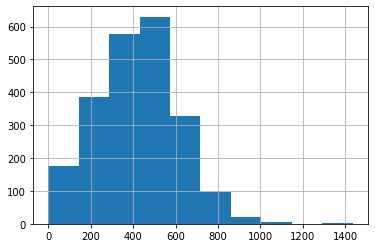

In [71]:
calls_duration_by_user_smart['duration'].hist()


The distribution for the "Smart" tariff is close to normal.

In [72]:
calls_duration_by_user_smart['duration'].mean()

419.0629779577148

In [73]:
variance_estimate_smart_calls=np.var(calls_duration_by_user_smart['duration'], ddof=1)

In [74]:
print(variance_estimate_smart_calls)

35844.1895513438


In [75]:
standard_dev_smart_calls=np.std(calls_duration_by_user_smart['duration'], ddof=1)

In [76]:
print(standard_dev_smart_calls)

189.3256177894154


In [77]:
calls_duration_by_user_smart['duration'].describe()

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: duration, dtype: float64

The average call duration for the "Smart" tariff is 419 minutes, and the significant standard deviation is 189 minutes.

Thus, we can conclude that users on the "Ultra" tariff exhibit more variation in call duration compared to users on the "Smart" tariff.

#### How many messages and gigabytes users consume each month on the "Smart" and "Ultra" tariffs

In [78]:
messages_monthly=calls_messages_internet_users.pivot_table(index='month', columns='tariff', values=['messages'], aggfunc='sum')

<AxesSubplot:xlabel='month'>

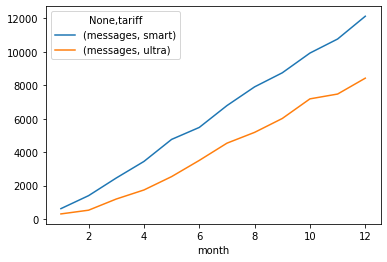

In [79]:
messages_monthly.plot()

The graph shows that users on the "Ultra" tariff send fewer messages per month compared to users on the "Smart" tariff. Additionally, the number of messages per month appears to be increasing. This trend might be attributed to users gradually subscribing over the years.

In [80]:
messages_by_user=messages_by_user.merge(users, on='user_id', how='outer')

In [81]:
messages_by_user_ultra=messages_by_user.query('tariff=="ultra"')

In [82]:
messages_by_user_smart=messages_by_user.query('tariff=="smart"')

<AxesSubplot:>

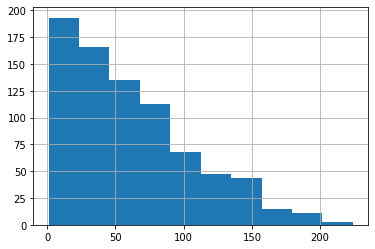

In [83]:
messages_by_user_ultra['id'].hist()

We can observe that the distribution is left-skewed. The vertical axis represents the number of users, and the horizontal axis represents the number of messages. The majority of users on the "Ultra" tariff send between 0 and 40 messages per month.

In [84]:
messages_by_user_ultra['id'].mean()

61.161006289308176

In [85]:
variance_estimate_ultra_messages=np.var(messages_by_user_ultra['id'], ddof=1)

In [86]:
print(variance_estimate_ultra_messages)

2109.6591828651995


In [87]:
standard_dev_ultra_messages=np.std(messages_by_user_ultra['id'], ddof=1)

In [88]:
print(standard_dev_ultra_messages)

45.93102636416042


In [89]:
messages_by_user_ultra['id'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: id, dtype: float64

The average number of messages for the "Ultra" tariff is 61, with a significant standard deviation of 45 messages.

<AxesSubplot:>

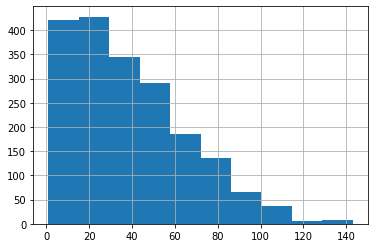

In [90]:
messages_by_user_smart['id'].hist()

We can observe that the distribution is left-skewed. The vertical axis represents the number of users, and the horizontal axis represents the number of messages per month. The majority of users on the "Ultra" tariff use between 0 and 30 messages per month.

In [91]:
messages_by_user_smart['id'].mean()

38.71644120707596

In [92]:
variance_estimate_smart_messages=np.var(messages_by_user_smart['id'], ddof=1)

In [93]:
print(variance_estimate_smart_messages)

717.5942011753547


In [94]:
standard_dev_smart_messages=np.std(messages_by_user_smart['id'], ddof=1)

In [95]:
print(standard_dev_smart_messages)

26.787948804926344


In [96]:
messages_by_user_smart['id'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: id, dtype: float64

Thus, we can conclude that users on the "Ultra" tariff exhibit more variation in the number of sent messages compared to users on the "Smart" tariff.

#### How many gigabytes of internet do users consume each month on the "Smart" and "Ultra" tariffs


In [97]:
Gb_used_monthly=calls_messages_internet_users.pivot_table(index='month', columns='tariff', values=['Gb_used'], aggfunc='sum')

<AxesSubplot:xlabel='month'>

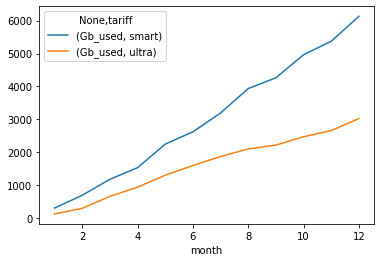

In [98]:
Gb_used_monthly.plot()

The graph shows that users on the "Ultra" tariff consume less internet traffic per month compared to users on the "Smart" tariff. Additionally, the amount of traffic per month appears to be increasing. This trend might be due to users gradually subscribing over the years.

In [99]:
internet_by_user=internet_by_user.merge(users, on='user_id', how='outer')

In [100]:
internet_by_user_ultra=internet_by_user.query('tariff=="ultra"')

In [101]:
internet_by_user_smart=internet_by_user.query('tariff=="smart"')

<AxesSubplot:>

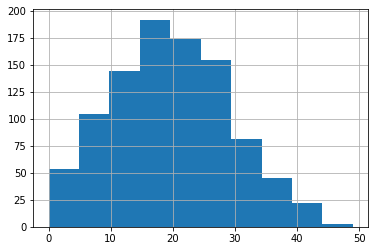

In [102]:
internet_by_user_ultra['Gb_used'].hist()

In [103]:
internet_by_user_ultra['Gb_used'].mean()

19.694358974358973

In [104]:
variance_estimate_ultra_internet=np.var(internet_by_user_ultra['Gb_used'], ddof=1)

In [105]:
print(variance_estimate_ultra_internet)

94.14673405991682


In [106]:
standard_dev_ultra_internet=np.std(internet_by_user_ultra['Gb_used'], ddof=1)

In [107]:
print(standard_dev_ultra_internet)

9.70292399536948


In [108]:
internet_by_user_ultra['Gb_used'].describe()

count    975.000000
mean      19.694359
std        9.702924
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: Gb_used, dtype: float64

<AxesSubplot:>

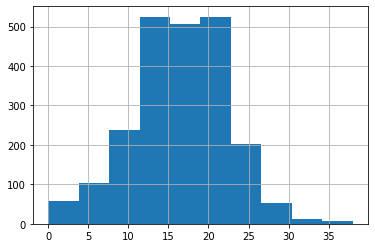

In [109]:
internet_by_user_smart['Gb_used'].hist()

In [110]:
internet_by_user_smart['Gb_used'].mean()

16.33617594254937

In [111]:
variance_estimate_smart_internet=np.var(internet_by_user_smart['Gb_used'], ddof=1)

In [112]:
print(variance_estimate_smart_internet)

32.92375582354312


In [113]:
standard_dev_smart_internet=np.std(internet_by_user_smart['Gb_used'], ddof=1)

In [114]:
print(standard_dev_smart_internet)

5.737922605224221


In [115]:
internet_by_user_smart['Gb_used'].describe()

count    2228.000000
mean       16.336176
std         5.737923
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: Gb_used, dtype: float64

The average monthly usage in gigabytes and the standard deviation for each user on the "Smart" tariff are 15 and 5, respectively. For the "Ultra" tariff, the average usage is 19.9. Thus, we can conclude that users on the "Ultra" tariff exhibit more variation in their internet usage compared to users on the "Smart" tariff.

## Hypothesis testing

#### The average revenue of users on the "Ultra" and "Smart" tariffs differs.

The null hypothesis (Ho) is always formulated to use the equality sign.

Ho: The average revenue of users on the "Ultra" tariff is equal to the average revenue of users on the "Smart" tariff.

H1: The average revenue of users on the "Ultra" tariff is not equal to the average revenue of users on the "Smart" tariff.

We need to compare the means of two populations.

In [116]:
from scipy import stats as st 

In [117]:
alpha=0.05

alpha = 0.05 is the critical level of statistical significance. If the p-value is smaller than alpha, we will reject the hypothesis.

In [118]:
calls_messages_internet_users_smart=calls_messages_internet_users.query('tariff=="smart"')

In [119]:
sample_smart=calls_messages_internet_users_smart['revenue']

In [120]:
calls_messages_internet_users_ultra=calls_messages_internet_users.query('tariff=="ultra"')

In [121]:
sample_ultra=calls_messages_internet_users_ultra['revenue']

In [122]:
results1=st.ttest_ind(sample_smart, sample_ultra)

In [138]:
print('p-value:', results1.pvalue)

p-value: 3.12960566802007e-106


In [139]:
if results1.pvalue <alpha:
    print ('We reject the null hypothesis')
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Since the p-value is lower than the critical level of statistical significance, we reject the null hypothesis. The average revenue of the "Ultra" tariff is not equal to the average revenue of the "Smart" tariff

## Conclusion

As a result of the conducted analysis, the following key conclusions can be drawn:


The average revenue of the "Ultra" tariff is not equal to the average revenue of the "Smart" tariff.

In total, the revenue from users on the "Smart" tariff is higher than the revenue from the "Ultra" tariff due to the larger number of users.

The average revenue from residents of Moscow is higher than the average revenue from users in other regions

The behavior of "Ultra" tariff users exhibits more variation among themselves compared to the behavior of "Smart" tariff users

Since the average revenue between the two groups of users is different and the Smart tariff brings more revenue, it can be recommended to allocate the marketing budget in favor of the Smart tariff. 